# Relation Between YouTube Video Title and Views

This notebook is to find the relation between the title of YouTube Videos and the views.
Collaborator: Chih-Wei Huang, Cong Shen
Date: 10/22/2021

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Import US Youtube Video Data

In [2]:
#import US data from the CSV
us_yt = pd.read_csv('data/USvideos.csv')
display(us_yt.info)
display(us_yt.head())

<bound method DataFrame.info of           video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualis

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# drop unnecessary columns
us_yt.drop(['video_id','trending_date','category_id','thumbnail_link','video_error_or_removed','comments_disabled','ratings_disabled', 'description'],axis=1,inplace=True)

#sort by top views
us_yt.sort_values(["views"], axis=0,ascending=[False], inplace=True)
display(us_yt.head())

,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count
38547,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232
38345,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337
38146,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799
37935,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722
37730,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211


In [4]:
#eliminate duplicate rows and keep the one with highest views(the latest)
us_yt = us_yt.drop_duplicates(subset='title', keep='first')
display(us_yt.head())
display(us_yt.info)

,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count
38547,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698
34708,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039
34888,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655


<bound method DataFrame.info of                                                    title        channel_title  \
38547  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
6181   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
34708               Ariana Grande - No Tears Left To Cry     ArianaGrandeVevo   
34888  Becky G, Natti Natasha - Sin Pijama (Official ...           BeckyGVEVO   
38273                BTS (방탄소년단) 'FAKE LOVE' Official MV              ibighit   
...                                                  ...                  ...   
160               Huffy Metaloid Bicycle Commercial 1997      90s Commercials   
12716     Raw: 3 South Carolina Deputies, 1 Officer Shot     Associated Press   
14984                                      Artwork Forge     Palo Alto Online   
777        Coach Taggart Monday Presser Ahead of Arizona        GoDucksdotcom   
14782   1 dead, others injured after Ky. school shooting                Newsy

In [5]:
#Word count in each title:
us_yt['count_title'] = us_yt["title"].apply(lambda x: len(str(x).split()))

[None, None]

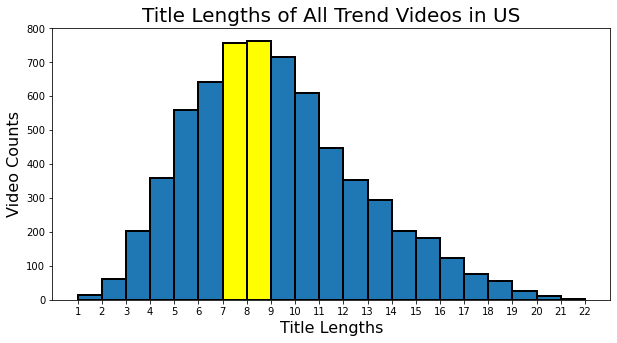

In [6]:
#visualization
plt.figure(figsize=(10,5))
bins_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
n, bins, patches = plt.hist(us_yt['count_title'], bins=bins_list, edgecolor = 'black', lw=2)
plt.title('Title Lengths of All Trend Videos in US',fontsize=20)
plt.xticks(bins_list)
plt.xlabel('Title Lengths',fontsize=16)
plt.ylabel('Video Counts',fontsize=16)
plt.setp(patches[6:8], facecolor='yellow') 

In [7]:
#upper case words count in each title:
us_yt["count_upper"] = us_yt["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

In [8]:
#lambda function testing
test = lambda x: len([w for w in str(x).split() if w.isupper()])
print(test('UC Berkeley OFFICIAL YouTube VIDEO'))

3


Text(0, 0.5, 'Video Counts')

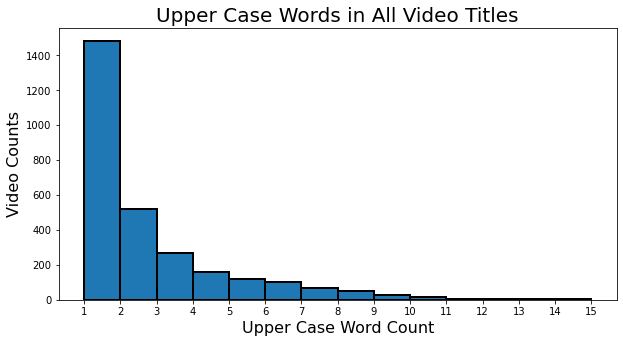

In [9]:
plt.figure(figsize=(10,5))
bins_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
n, bins, patches = plt.hist(us_yt['count_upper'], bins=bins_list, edgecolor = 'black', lw=2)
plt.title('Upper Case Words in All Video Titles',fontsize=20)
plt.xticks(bins_list)
plt.xlabel('Upper Case Word Count',fontsize=16)
plt.ylabel('Video Counts',fontsize=16)